In [1]:
# listing environments in conda
!conda env list

# conda environments:
#
base                  *  /usr/local/anaconda3



In [2]:
# check current environment in Python
import os
print(os.environ['CONDA_DEFAULT_ENV'])

base


In [3]:
import datetime, time
now = datetime.datetime.now()
if now.hour >= 5 and now.hour < 12:
    print("A fresh Jupyter feels like a morning cup of coffee!")
print("Keep working")

A fresh Jupyter feels like a morning cup of coffee!
Keep working


In [4]:
%%latex
\begin{align}
F=ma
\end{align}

<IPython.core.display.Latex object>

In [5]:
# List magic commands in Jupyter
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [6]:
%%timeit
"-".join([str(n) for n in range(100)])

31.5 µs ± 2.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
from PIL import Image
import numpy as np

# Load image using PIL
im = Image.open('media/kiteboard_jump.jpg') 
# make a numpy array
arr = np.array(im)
# print shape (size)
print(arr.shape)

(512, 512, 3)


In [8]:
kiteboarder = arr[:300,100:400]
print(kiteboarder.shape)

(300, 300, 3)


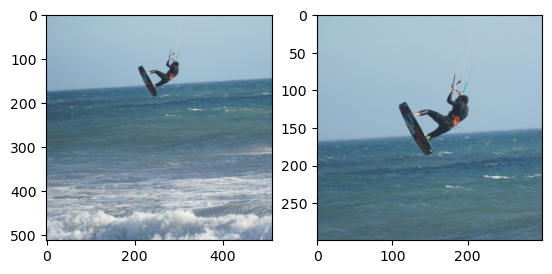

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(im)
ax[1].imshow(kiteboarder)
plt.show()

**Pandas**

In [10]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

s = pd.Series(np.random.randn(5))
print(s)

0   -0.451200
1   -0.745261
2   -1.150679
3    0.692840
4    0.132167
dtype: float64


In [11]:
d = {'category':['summer','summer','summer','summer','winter', 'all-season', 'summer', 'winter','winter','summer', 'summer'], 
     'sports':['running','walking','cycling','hiking','alpine ski', 'dog walking', 'mountain bike',  'cross country ski', 'snowboard', 'inline skating', 'trekking'],
     'trails':[323909,174189,85908,56751,40339,33573,9957,8817,8674,5495,3051]
    }
df = pd.DataFrame(d)
display(df)

,category,sports,trails
0,summer,running,323909
1,summer,walking,174189
2,summer,cycling,85908
3,summer,hiking,56751
4,winter,alpine ski,40339
5,all-season,dog walking,33573
6,summer,mountain bike,9957
7,winter,cross country ski,8817
8,winter,snowboard,8674
9,summer,inline skating,5495


In [12]:
df.groupby('category').describe()

trails                                                          \
            count          mean            std      min      25%      50%   
category                                                                    
all-season    1.0  33573.000000            NaN  33573.0  33573.0  33573.0   
summer        7.0  94180.000000  118257.661585   3051.0   7726.0  56751.0   
winter        3.0  19276.666667   18240.655864   8674.0   8745.5   8817.0   

                                
                 75%       max  
category                        
all-season   33573.0   33573.0  
summer      130048.5  323909.0  
winter       24578.0   40339.0

**Visualization, Matplotlib**

In [13]:
!pip install pydicom

In [14]:
import os, sys

dicom_file = 'data/mri/knee.dcm'
output_path = "_output/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [15]:
import pydicom as dicom

ds = dicom.dcmread(dicom_file)
print(ds.StudyDescription)

Lower Extremity^Knee


In [16]:
import numpy as np 

img = ds.pixel_array
np.save(dicom_file+".npy", img)
print(np.shape(img))
print(img.min(),img.max())
print(img.mean())

(512, 512)
0 1743
283.26586151123047


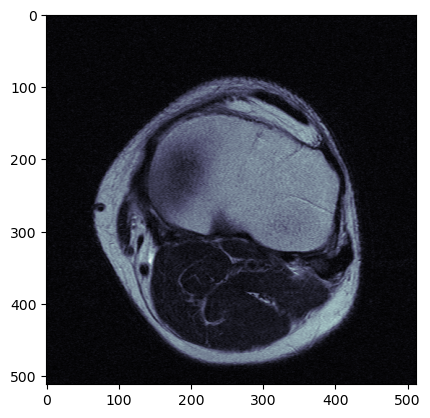

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.imshow(img, cmap=plt.cm.bone)
plt.show()

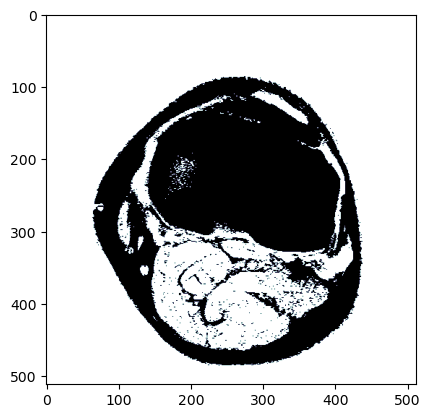

In [18]:
# Creating binary mask
arr = np.zeros(img.shape)
mask = img <= img.mean()
arr[mask] = 1
mask = img > img.mean()
arr[mask] = 0
plt.imshow(arr, cmap=plt.cm.bone)
plt.show()

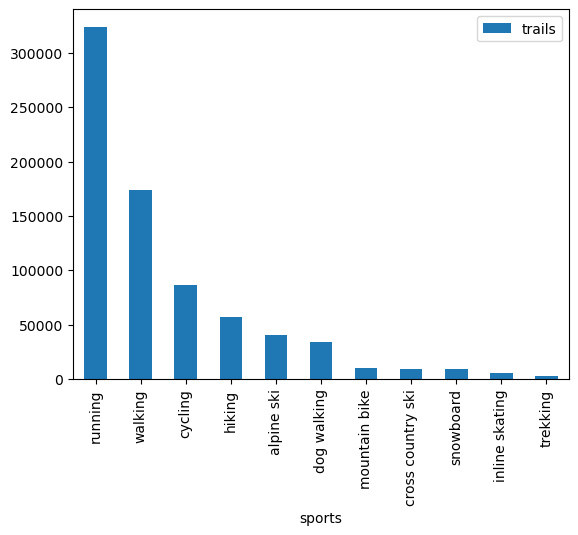

In [19]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='sports', y='trails')
plt.show()

**SciPy, scikit-image**

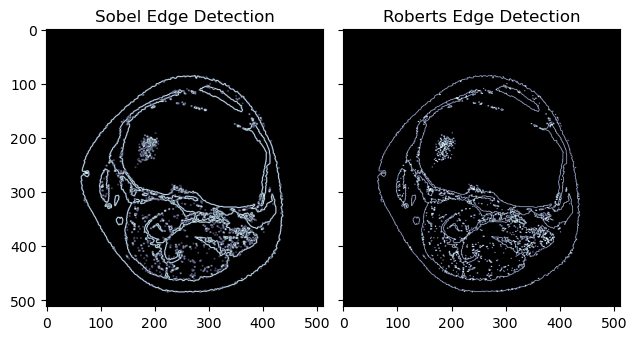

In [20]:
from skimage import filters

edge_sobel = filters.sobel(arr)
edge_roberts = filters.roberts(arr)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].imshow(edge_sobel, cmap=plt.cm.bone)
ax[0].set_title('Sobel Edge Detection')
ax[1].imshow(edge_roberts, cmap=plt.cm.bone)
ax[1].set_title('Roberts Edge Detection')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


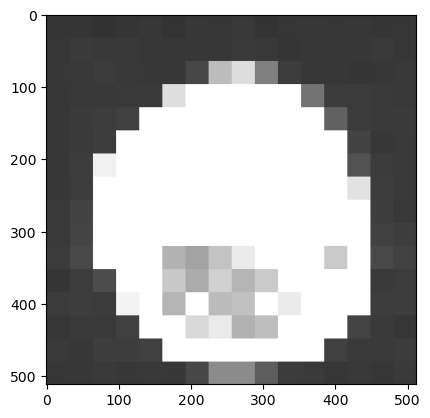

In [21]:
import skimage
from skimage.color import rgb2gray, label2rgb
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = ds.pixel_array
segments_slic = slic(img, n_segments=256)
segments_slic_image = skimage.color.label2rgb(segments_slic, img, kind='avg')
plt.imshow(segments_slic_image)
plt.show()

**Segmentation**

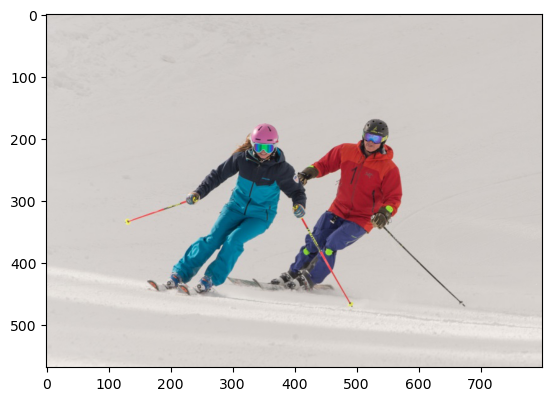

In [22]:
from PIL import Image

image = Image.open('media/skiers.jpg')
img = np.array(image)
plt.imshow(img)
plt.show()

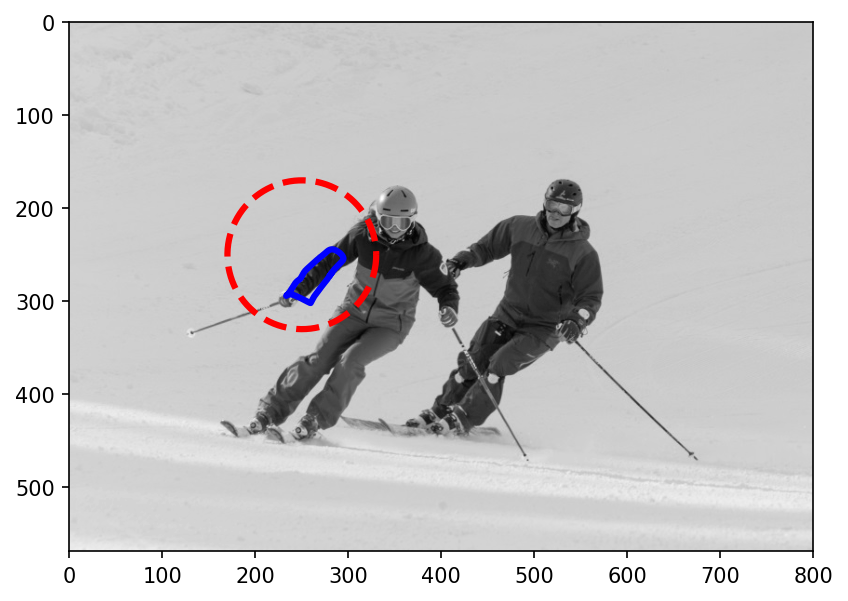

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
# Make image gray tone for contours
img = rgb2gray(img)
# Initialize spline
s = np.linspace(0, 2*np.pi, 200)
init = 80*np.array([np.cos(s), np.sin(s)]).T + 250
# Fit spline to image
snake = active_contour(gaussian(img, 3),init)
fig, ax = plt.subplots(dpi=150)
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

**OpenCV**

In [24]:
!pip install opencv-python

In [25]:
# Note: this script needs to open a window!
import cv2
import numpy as np
from datetime import timedelta
import time
from scipy.spatial import distance as dist
import os, sys

# Video
video = cv2.VideoCapture("media/diving.mp4")

point = (732, 412)
old_points = np.array([point], dtype=np.float32)
point_selected = True

# Lucas-Kanade params
lk_params = dict(winSize = (15, 15),
                 maxLevel = 4,
                 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

cv2.namedWindow("Frame")
color = np.random.randint(0,255,(100,3))

# Create old frame
_, frame = video.read()
h,w,channels = frame.shape
if not os.path.exists(output_path):
    os.makedirs(output_path)
out = cv2.VideoWriter(output_path+"diving_out.mp4",cv2.VideoWriter_fourcc(*'mp4v'), 5, (w,h))
old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(frame)

lowest_point = 0
start = None
THRESH = 50

while True:
    _, frame = video.read()
    if frame is None:
        break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    new_points, status, error = cv2.calcOpticalFlowPyrLK(old_gray, gray_frame, old_points, None, **lk_params)
    old_gray = gray_frame.copy()

    for i,(new,old) in enumerate(zip(new_points,old_points)):
        a,b = new.ravel()
        if start is None:
            start = a
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(),2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
        if b > lowest_point and abs(a - start) <= THRESH:
            low = np.zeros_like(frame)
            low = cv2.circle(low, (a,b), 5, color[i+1].tolist(), -1)
            lowest_point = b
    img = cv2.add(frame,mask) 
    img = cv2.add(img, low)
    cv2.imshow('Frame',img)
    out.write(img)

    old_points = new_points.reshape(-1,2)
        
    key = cv2.waitKey(1)
    if key == 27:
        break
 
video.release()
out.release()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
